**Netflix Movies and TV SHOW**

#####Latar Belakang Dataset#####

Netflix adalah salah satu platform streaming paling terkenal dan terus tumbuh lebih besar dan lebih cepat dengan popularitas, pertunjukan, dan konten berkualitasnya. Sedangkan TV Show adalah acara yang ditontonkan melalui televisi. Notebook ini tentang EDA atau cerita awal melalui data, bersama dengan sistem rekomendasi berbasis konten, grafik dan visual yang berbeda.

#####Pertanyaan Analisis

1.    Bandingkan antara acara televisi dengan netflix, yang manakah tontonan film terbanyak diantara kedua?
2.    Tentukanlan 5 negara teratas dengan film dan acara tv!
3.    Pada tahun berapakah sebagian film dirilis?
4.    Genre film apakah yang menjadi top kategori dalam penayangan film di tv atupun netflix?

#####EDA (Eksplorasi Data Analisis)#####

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
data = pd.read_csv('/netflix_titles.csv.zip')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [59]:
#Menganalisis data berdasarkan waktu rilis
# konversi data_added dari string ke tanggal waktu
data['data_added'] = pd.to_datetime(data['date_added'])

# buat data frame yang berisi tahun
data['year_added'] = data['data_added'].dt.year

# buat data frame yang berisi bulan
data['month_added'] = data['data_added'].dt.month

data.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,data_added,year_added,month_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,9.0
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,9.0
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0,9.0


#####Preparation Data dan Visualisasi Data#####

In [40]:
data.shape

(8807, 12)

In [41]:
data.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**1. Bandingkan antara acara televisi dengan netflix, yang manakah tontonan film terbanyak diantara kedua?**

In [44]:
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

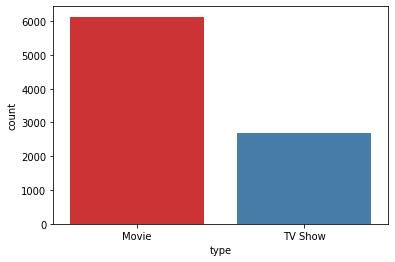

In [55]:
#Visualisasi Data 
sns.countplot(data = data , x =data['type'] ,palette='Set1' )

Terbukti bahwa netflix memiliki lebih banyak film daripada acara Televisi.

**2. Tentukanlah 5 negara teratas dengan film dan acara tv!**

In [47]:
data.country.nunique()

748

In [48]:
data.country.value_counts()

United States                          2818
India                                   972
United Kingdom                          419
Japan                                   245
South Korea                             199
                                       ... 
United Kingdom, Russia                    1
Hong Kong, China, Singapore               1
United Kingdom, Spain, Belgium            1
Venezuela, Colombia                       1
Netherlands, Germany, Italy, Canada       1
Name: country, Length: 748, dtype: int64

In [49]:
values = data.country.value_counts()[:5].tolist()
labels = data.country.value_counts()[:5].index.tolist()

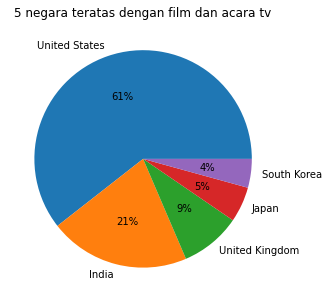

In [52]:
#Visualisasi Data 
plt.figure(figsize=(5, 5))
plt.pie(values , labels=labels , autopct='%1.0f%%'  )
plt.title('5 negara teratas dengan film dan acara tv') ;


Terlihat bahwa Amerika Serikat, India, Inggris, Jepang, dan Korea Selatan dalah lima negara pertama di film dan acara TV.



**3. Pada tahun berapakah sebagian film dirilis?**

In [72]:
sort_data = data.sort_values("release_year", ascending = True)
sort_data[['title', "release_year"]][:15]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
7930,San Pietro,1945


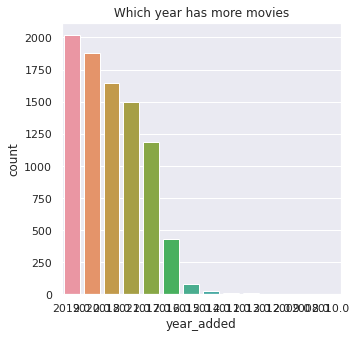

In [62]:
#Visualisasi Data 
plt.figure(figsize=(5 , 5 ))
sns.set(style='darkgrid')
sns.countplot(data = data , x = data['year_added'] , order=data['year_added'].value_counts().index[0:14])
plt.title(' Which year has more movies ') ;

2019 dan 2020 adalah tahun ketika sebagian besar film dirilis

**4. Genre film apakah yang menjadi top kategori dalam penayangan film di tv atupun netflix?**

In [63]:
values_categories =  data['listed_in'].value_counts()[:10].tolist()
labels_categories = data['listed_in'].value_counts()[:10].index.tolist()

In [64]:
labels_categories

['Dramas, International Movies',
 'Documentaries',
 'Stand-Up Comedy',
 'Comedies, Dramas, International Movies',
 'Dramas, Independent Movies, International Movies',
 "Kids' TV",
 'Children & Family Movies',
 'Children & Family Movies, Comedies',
 'Documentaries, International Movies',
 'Dramas, International Movies, Romantic Movies']

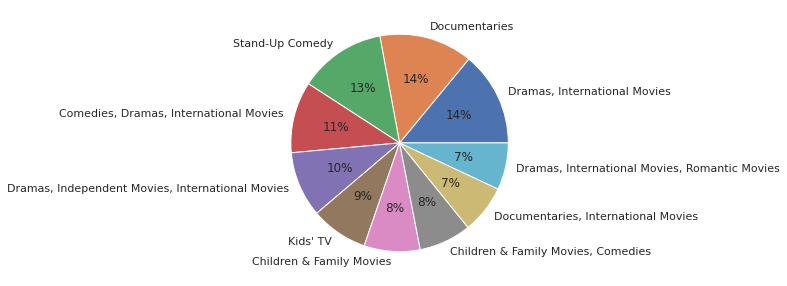

In [73]:
#Visualisasi Data 
plt.figure(figsize=(5,5))
top_categories = data['listed_in']
top2 = top_categories.value_counts().head()
plt.pie( values_categories , labels=labels_categories , autopct='%1.0f%%' ) ; 

Genre yang menjadi top kategori adalah film documentaries dan drama, International Movies 

**Selesai**